/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/beach.png


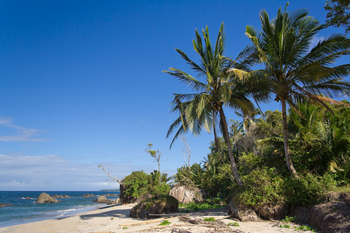

(233, 350, 3)

In [4]:
# USAGE
# python grayscale_histogram.py --image ../images/beach.png
import os
import argparse
import pathlib
from typing import Union, Any

import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/beach.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

image.shape


2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


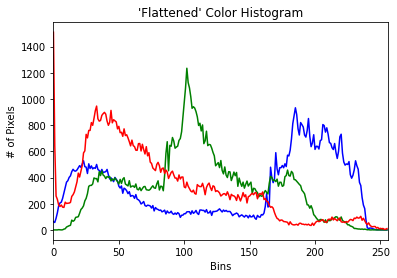

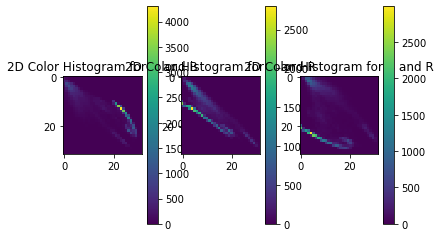

In [5]:
# Grab the image channels, initialize the tuple of colors
# and the figure
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# Loop over the image channels
for (chan, color) in zip(chans, colors):
    # Create a histogram for the current channel and plot it
    # The code is identical to that of computing a histogram
    # for the grayscale image; however, we are doing it for each
    # Red, Green, and Blue channel, allowing us to characterize
    # the distribution of pixel intensities. We add our histogram
    # to the plot
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])




In [ ]:
# For example, we can ask a question such as, “How many
# pixels have a Red value of 10 AND a Blue value of 30?”.
# How many pixels have a Green value of 200 AND a Red
# value of 130? By using the conjunctive AND, we are able to
# construct multi-dimensional histograms.

In [6]:
# We can examine our color histogram in Figure 7.2. We
# see there is a sharp peak in the green histogram around bin
# 100. This indicates a darker green value, from the green
# vegetation and trees in the beach image.

2D histogram shape: (32, 32), with 1024 values


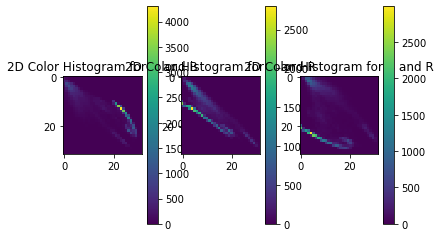

In [9]:
# Let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
fig = plt.figure()

# Plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
# Most applications use somewhere between 8 and 64 bins when
# computing multi-dimensional histograms.
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# Plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# Plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# Finally, let's examine the dimensionality of one of
# the 2D histograms
print(
    "2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0])
)



In [10]:
# Our 2D histogram could only take into account 2 out
# of the 3 channels in the image so now let's build a
# 3D color histogram (utilizing all channels) with 8 bins
# in each direction -- we can't plot the 3D histogram, but
# the theory is exactly like that of a 2D histogram, so
# we'll just show the shape of the histogram
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print(
    "3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0])
)

# Show our plots
plt.show()

3D histogram shape: (8, 8, 8), with 512 values
